In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from tensorflow.keras import Sequential
from tensorflow.keras import activations
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

from Optimizer.RMSProp import RMSProp

In [2]:
X, y = make_classification(n_samples=10000, random_state=123)

In [3]:
model = Sequential()
model.add(Dense(32, input_dim=20, activation=activations.relu))
model.add(Dense(32, activation=activations.relu))
model.add(Dense(1, activation=activations.sigmoid))
optimizer = RMSProp()
model.compile(optimizer=optimizer, loss=BinaryCrossentropy(), metrics=['accuracy'])
model.build(input_shape=(64, 20))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                672       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [4]:
rms_prop_history = model.fit(X, y, epochs=50, batch_size=64)

Train on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 0s 32us/sample - loss: 0.6175 - acc: 0.6796
Epoch 2/50
10000/10000 [==============================] - 0s 19us/sample - loss: 0.5443 - acc: 0.7814
Epoch 3/50
10000/10000 [==============================] - 0s 24us/sample - loss: 0.4788 - acc: 0.8338
Epoch 4/50
10000/10000 [==============================] - 0s 22us/sample - loss: 0.4194 - acc: 0.8669
Epoch 5/50
10000/10000 [==============================] - 0s 16us/sample - loss: 0.3671 - acc: 0.8861
Epoch 6/50
10000/10000 [==============================] - 0s 14us/sample - loss: 0.3231 - acc: 0.8985
Epoch 7/50
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2875 - acc: 0.9075
Epoch 8/50
10000/10000 [==============================] - 0s 14us/sample - loss: 0.2597 - acc: 0.9154
Epoch 9/50
10000/10000 [==============================] - 0s 16us/sample - loss: 0.2387 - acc: 0.9204
Epoch 10/50
10000/10000 [==============================] - 

In [5]:
model = Sequential()
model.add(Dense(32, input_dim=20, activation=activations.relu))
model.add(Dense(32, activation=activations.relu))
model.add(Dense(1, activation=activations.sigmoid))
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss=BinaryCrossentropy(), metrics=["accuracy"])
adam_history = model.fit(X, y, epochs=50, batch_size=64)

Train on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 0s 23us/sample - loss: 0.6886 - acc: 0.5359
Epoch 2/50
10000/10000 [==============================] - 0s 16us/sample - loss: 0.6349 - acc: 0.6513
Epoch 3/50
10000/10000 [==============================] - 0s 17us/sample - loss: 0.5843 - acc: 0.7385
Epoch 4/50
10000/10000 [==============================] - 0s 16us/sample - loss: 0.5304 - acc: 0.7957
Epoch 5/50
10000/10000 [==============================] - 0s 17us/sample - loss: 0.4732 - acc: 0.8345
Epoch 6/50
10000/10000 [==============================] - 0s 20us/sample - loss: 0.4160 - acc: 0.8623
Epoch 7/50
10000/10000 [==============================] - 0s 16us/sample - loss: 0.3636 - acc: 0.8837
Epoch 8/50
10000/10000 [==============================] - 0s 15us/sample - loss: 0.3196 - acc: 0.9005
Epoch 9/50
10000/10000 [==============================] - 0s 19us/sample - loss: 0.2846 - acc: 0.9104
Epoch 10/50
10000/10000 [==============================] - 

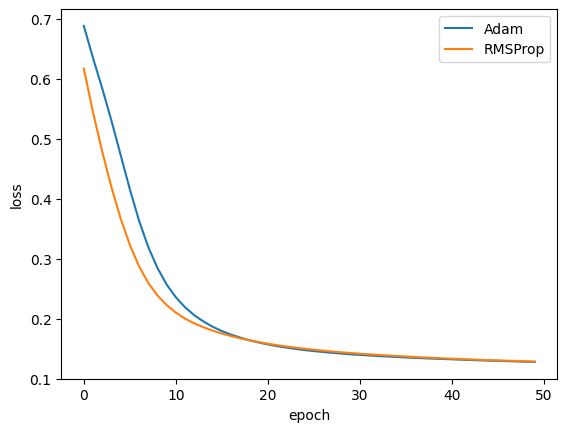

In [6]:
plt.plot(adam_history.epoch,adam_history.history['loss'], label='Adam')
plt.plot(rms_prop_history.epoch, rms_prop_history.history['loss'], label="RMSProp")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()